In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("breast cancer data.csv")

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [7]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
x_scaled=scaler.fit_transform(x_data)

In [12]:
x_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [17]:
scaled_data = pd.DataFrame(x_scaled, columns=x_data.columns)

In [18]:
scaled_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### splitting train and test samples

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.15, random_state=42)

In [20]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (483, 30)
x test:  (86, 30)
y train:  (483,)
y test:  (86,)


#### logistic model interpretation

In [23]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [28]:
def compute_loss(y_true, y_pred):
    # Avoiding log(0) with small addition
    val = 1e-15
    y_pred = np.clip(y_pred, val, 1 - val)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [47]:
# Gradient descent optimization for logistic regression
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    """
    X: Input feature matrix (shape: m x n)
    y: Target labels (shape: m x 1)
    learning_rate: Step size for gradient descent
    epochs: Number of iterations
    """
    # Initialize weights and bias
    m, n = X.shape  # m: number of samples, n: number of features
    weights = np.zeros(n)
    bias = 0
    loss_list = []
    loss_list2 = []
    index = []
    for epoch in range(epochs):
        # Compute linear combination
        z = np.dot(X, weights) + bias

        # Apply sigmoid to get predictions
        y_pred = sigmoid(z)

        # Compute the loss
        loss = compute_loss(y, y_pred)
        loss_list.append(loss)
        if epoch % 100 == 0:
            loss_list2.append(loss)
            index.append(epoch)
            print ("Cost after iteration %i: %f" %(epoch, loss))
        # Gradients calculation
        dw = np.dot(X.T, (y_pred - y)) / m  # Gradient w.r.t. weights
        db = np.sum(y_pred - y) / m         # Gradient w.r.t. bias

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    plt.plot(index,loss_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    return weights, bias, loss_list

In [59]:
#### model prediction
def predict(X, weights, bias, threshold=0.5):
    probabilities = sigmoid(np.dot(X, weights) + bias)
    return probabilities,(probabilities >= threshold).astype(int)

Cost after iteration 0: 0.693147
Epoch 0, Loss: 0.6931
Cost after iteration 100: 0.502415
Epoch 100, Loss: 0.5024
Cost after iteration 200: 0.408058
Epoch 200, Loss: 0.4081
Cost after iteration 300: 0.352446
Epoch 300, Loss: 0.3524
Cost after iteration 400: 0.315645
Epoch 400, Loss: 0.3156
Cost after iteration 500: 0.289314
Epoch 500, Loss: 0.2893
Cost after iteration 600: 0.269406
Epoch 600, Loss: 0.2694
Cost after iteration 700: 0.253726
Epoch 700, Loss: 0.2537
Cost after iteration 800: 0.240986
Epoch 800, Loss: 0.2410
Cost after iteration 900: 0.230376
Epoch 900, Loss: 0.2304
Cost after iteration 1000: 0.221364
Epoch 1000, Loss: 0.2214
Cost after iteration 1100: 0.213583
Epoch 1100, Loss: 0.2136
Cost after iteration 1200: 0.206775
Epoch 1200, Loss: 0.2068
Cost after iteration 1300: 0.200749
Epoch 1300, Loss: 0.2007
Cost after iteration 1400: 0.195362
Epoch 1400, Loss: 0.1954


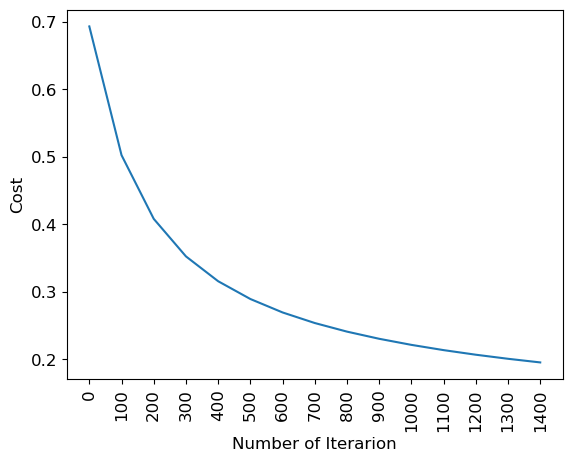

In [93]:
weights, bias, loss = logistic_regression(x_train, y_train, learning_rate=0.1, epochs=1500)

In [94]:
y_pred_proba,y_pred=predict(x_test,weights,bias)

In [95]:
y_test,y_pred,y_pred_proba

(array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
       dtype=int64),
 array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]),
 array([0.22089955, 0.94302252, 0.77537316, 0.08669849, 0.04877984,
        0.99895021, 0.99728603, 0.72816116, 0.51242851, 0.1337358 ,
        0.13849229, 0.69581088, 0.15348226, 0.53184003, 0.13333444,
        0.91464059, 0.14687007, 0.01525046, 0.00404958, 0.98347057,
        0.40481132, 0.09767545, 0.99699439, 0.02371154, 0.05701281,
        0.07926288, 0.1866041 , 0.07780257, 0.09783395, 

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<Axes: >

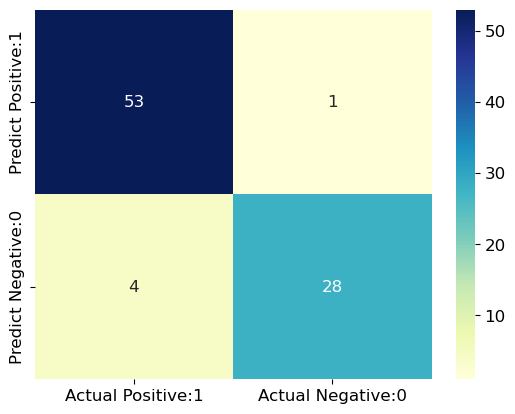

In [97]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.97      0.88      0.92        32

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



Text(0, 0.5, 'Frequency')

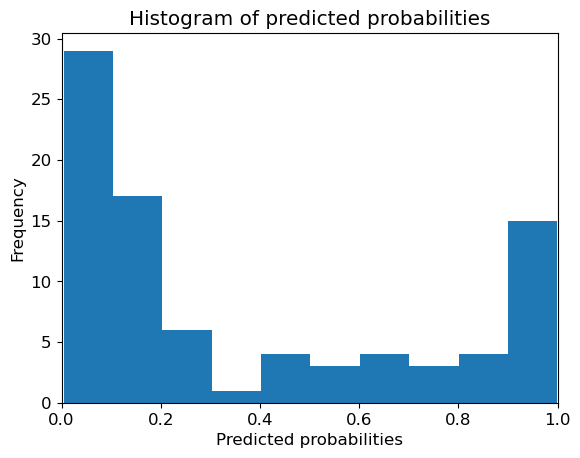

In [99]:
plt.hist(y_pred_proba, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')

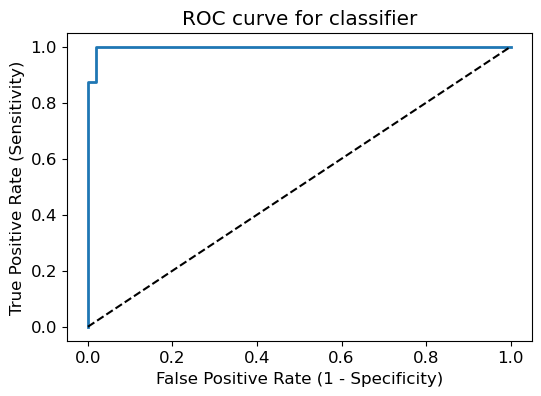

[0.         0.         0.         0.01851852 0.01851852 1.        ]
[0.      0.03125 0.875   0.875   1.      1.     ]


In [100]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
print(fpr)
print(tpr)

In [101]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9282
